In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/pralo/AI-marketing-optimization/data/cleaned/mmm_model_ready.csv")
df.head()

,display_ads,social_ads,affiliate_ads,GMV,week,display_ads_lag_1,display_ads_lag_2,display_ads_lag_3,display_ads_lag_4,social_ads_lag_1,...,social_ads_lag_3,social_ads_lag_4,affiliate_ads_lag_1,affiliate_ads_lag_2,affiliate_ads_lag_3,affiliate_ads_lag_4,display_ads_4w_avg,social_ads_4w_avg,affiliate_ads_4w_avg,GMV_4w_avg
0,180.8,10.8,58.4,12.9,2022-01-30,151.5,17.2,44.5,230.1,41.3,...,39.3,37.8,58.5,69.3,45.1,69.2,98.500,34.325,57.825,12.775
1,8.7,48.9,75.0,7.2,2022-02-06,180.8,151.5,17.2,44.5,10.8,...,45.9,39.3,58.4,58.5,69.3,45.1,89.550,36.725,65.300,11.975
2,57.5,32.8,23.5,11.8,2022-02-13,8.7,180.8,151.5,17.2,48.9,...,41.3,45.9,75.0,58.4,58.5,69.3,99.625,33.450,53.850,12.600
3,120.2,19.6,11.6,13.2,2022-02-20,57.5,8.7,180.8,151.5,32.8,...,10.8,41.3,23.5,75.0,58.4,58.5,91.800,28.025,42.125,11.275
4,8.6,2.1,1.0,4.8,2022-02-27,120.2,57.5,8.7,180.8,19.6,...,48.9,10.8,11.6,23.5,75.0,58.4,48.750,25.850,27.775,9.250


In [4]:
y = df["GMV_4w_avg"]

feature_cols = [c for c in df.columns if c not in ["week", "GMV", "GMV_4w_avg"]]
X = df[feature_cols]

In [5]:
split_idx = (int)(len(df) * 0.8)

x_train = X.iloc[:split_idx]
x_test = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(x_train_scaled, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = ridge.predict(x_test_scaled)

print(f"the regularised r2 score is: {r2_score(y_test, y_pred)}")
print(f"the regularised mae score is: {mean_absolute_error(y_test, y_pred)}")

the regularised r2 score is: 0.8498999584670068
the regularised mae score is: 0.7685217531265484


In [13]:
ridge_coef = pd.DataFrame({
    "feature": feature_cols,
    "coef": ridge.coef_
}).sort_values(by = "coef", ascending = False)

ridge_coef

,feature,coef
15,display_ads_4w_avg,1.026768
16,social_ads_4w_avg,0.654828
0,display_ads,0.544807
5,display_ads_lag_3,0.524746
3,display_ads_lag_1,0.512542
4,display_ads_lag_2,0.483211
8,social_ads_lag_2,0.393013
9,social_ads_lag_3,0.330219
7,social_ads_lag_1,0.303628
1,social_ads,0.266326


In [18]:
plot_df_ridge = pd.DataFrame({
    "week": df.iloc[len(y_train):]["week"].values,
    "actual_gmv": y_test.values,
    "predicted_gmv": y_pred
})

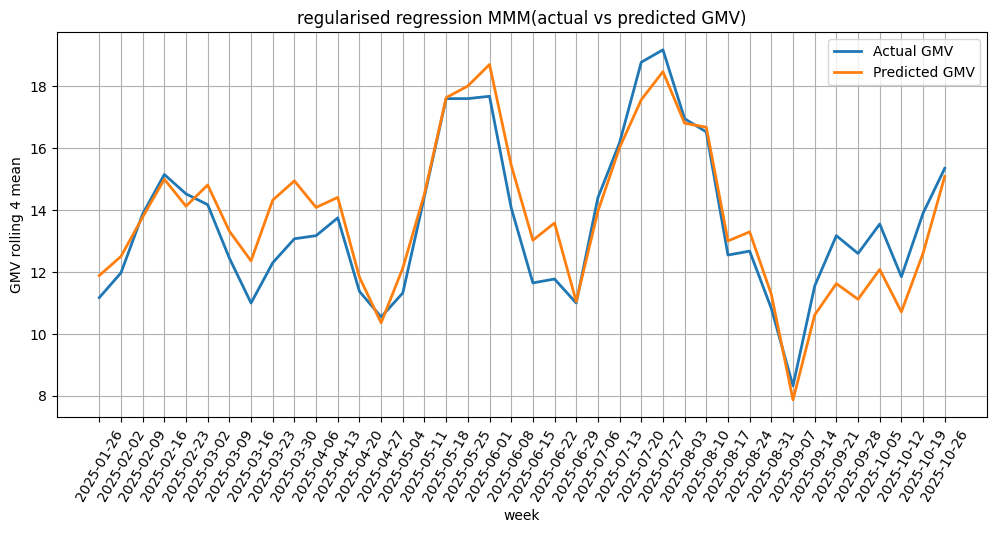

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))
plt.plot(plot_df_ridge["week"], plot_df_ridge["actual_gmv"], label = "Actual GMV", linewidth = 2)
plt.plot(plot_df_ridge["week"], plot_df_ridge["predicted_gmv"], label = "Predicted GMV", linewidth=2)
plt.title("regularised regression MMM(actual vs predicted GMV)")
plt.xlabel("week")
plt.xticks(rotation = 60)
plt.ylabel("GMV rolling 4 mean")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

Ridge regression was applied to address multicollinearity introduced by lagged and rolling marketing features. While predictive performance remains similar to the baseline linear model, the regularized model produces more stable coefficients and smoother predictions. Ridge regression is therefore chosen as the preferred linear baseline for subsequent modeling.